# Project: Investigating tmdb movies data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### In this report I'll investigate the tmdb data set.
#### There are 2 questions that I'll try two points I'll try to shed light on: 


### Question 1:
how movies' genres have grown over the period of the data (1960-2015) by pllotting the change in number of movies of each genre throughout the years
### Question 2: 
Who are the most successful directors in terms of profit and users ratings, and does a good financial profit mean that the movies was well met by the audience or not?

In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning
Movies with no genres were removed, specially almost all of them got neither revenue nor budget data as seen in the next cell. So they won't be of use in any of the 2 questions/points I'm discussing here

In [6]:
df.loc[df.genres.isnull(),["genres","revenue","budget",'original_title','runtime']]

,genres,revenue,budget,original_title,runtime
424,NaN,0,0,Belli di papÃ,100
620,NaN,0,0,All Hallows' Eve 2,90
997,NaN,0,0,Star Wars Rebels: Spark of Rebellion,44
1712,NaN,0,0,Prayers for Bobby,88
1897,NaN,0,0,Jonas Brothers: The Concert Experience,76
2370,NaN,0,0,Freshman Father,0
2376,NaN,0,0,Doctor Who: A Christmas Carol,62
2853,NaN,0,0,Vizontele,110
3279,NaN,0,0,ì•„ê¸°ì™€ ë‚˜,96
4547,NaN,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220


In [7]:
#drop based on null genere
df.drop(df.index[df.genres.isnull()],axis=0,inplace=True)
df.shape

(10843, 21)

Creat a new column of movie profit, this would be useful in answering the questions

In [8]:
df['profit'] = df.revenue_adj-df.budget_adj

#### calculate weighted value for each vote, as an average vote can be misleading here, it would make a movie given by one person a 10 stars rating a higher place compared to a movie given 9 stars by 100000 voters 
That would make sense looking at the top movies when using average votes and wighted vote displayed below the next cell

In [9]:
df['vote_count_ratio']= df.vote_count/df.vote_count.max()
df['weighted_vote']=df.vote_average*df.vote_count_ratio

In [10]:
df.sort_values(by='weighted_vote',ascending=False).head(10)['original_title']

1919                   Inception
2875             The Dark Knight
4361                The Avengers
1386                      Avatar
4364            Django Unchained
629                 Interstellar
4363       The Dark Knight Rises
2410                  The Matrix
4178    The Shawshank Redemption
2409                  Fight Club
Name: original_title, dtype: object

In [11]:
df.sort_values(by='vote_average',ascending=False).head(10)['original_title']

3894                        The Story of Film: An Odyssey
538                                  The Mask You Live In
1200                        Black Mirror: White Christmas
2269                                          Life Cycles
6911                                    Pink Floyd: Pulse
2401      Opeth: In Live Concert At The Royal Albert Hall
3690                                    The Art of Flight
3224    John Mayer: Where the Light Is Live in Los Ang...
8221    A Personal Journey with Martin Scorsese Throug...
8411                                Queen - Rock Montreal
Name: original_title, dtype: object

<a id='analysis'></a>
## Data analysis

###  1. Movies' genres analysis

#### In this step, explode will be used to create an entry of each movie for the different genres
#### To avoid any cofnusion, I'll make a copy of the dataframe

In [12]:
df.genres=df.genres.apply(lambda x:x.split("|"))
df_genres_analysis = df.explode('genres')
df_genres_analysis.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,vote_count_ratio,weighted_vote
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,0.569469,3.701546
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,0.569469,3.701546
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,0.569469,3.701546
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,0.569469,3.701546
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,0.633255,4.496109


#### In the next steps, I'll plot a line for each genre that shows the number of movies (by id) produced in each year

In [13]:
generes_per_year = df_genres_analysis.groupby(['release_year','genres'],as_index=False).id.agg('count')

In [14]:
generes_per_year.head()

,release_year,genres,id
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13


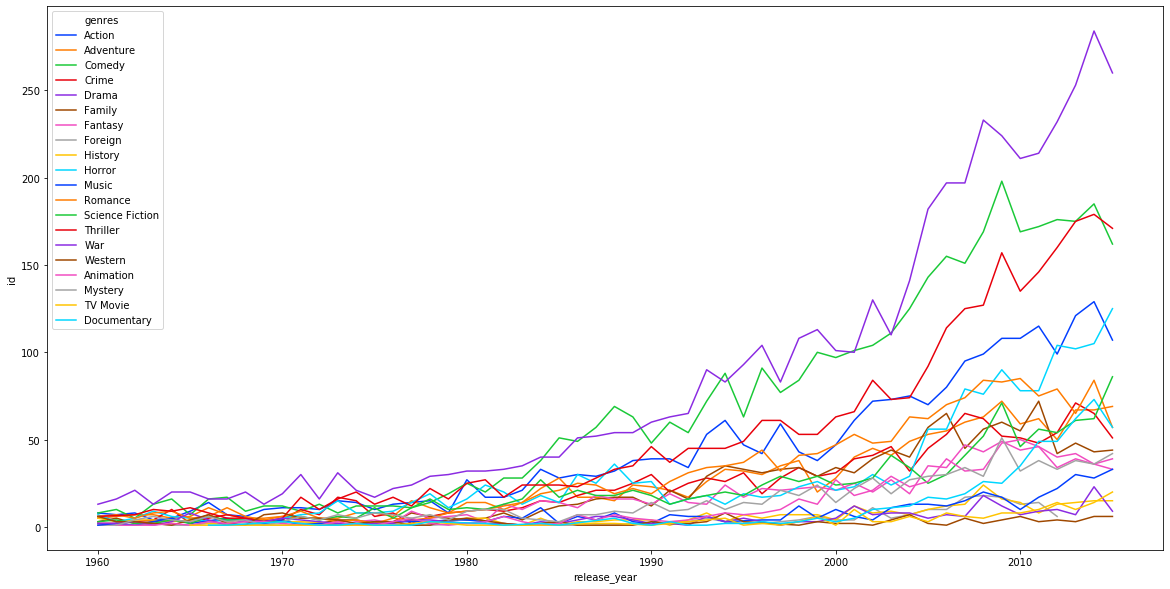

In [15]:
#palette = sns.color_palette("hls", 10)
# sns.relplot(kind="line",x="release_year", y="id", hue="genres",data =generes_per_year)
plt.figure(figsize=(20,10))
palette = sns.color_palette("bright", 20)
sns.lineplot(x="release_year", y="id", hue="genres",data =generes_per_year,palette=palette)


The previous figure shows that drama is the most popular and the most increasing genre in term of number of movies per year
It can be easily seen that Drama has been on the top almost all the period, comedy comes next and then thriller
We can have a better look if we zoom on the top and bottom 10

In [16]:
# top 10
top_10 = list(generes_per_year.groupby('genres').id.sum().sort_values(ascending=False).to_dict().keys())[:10]

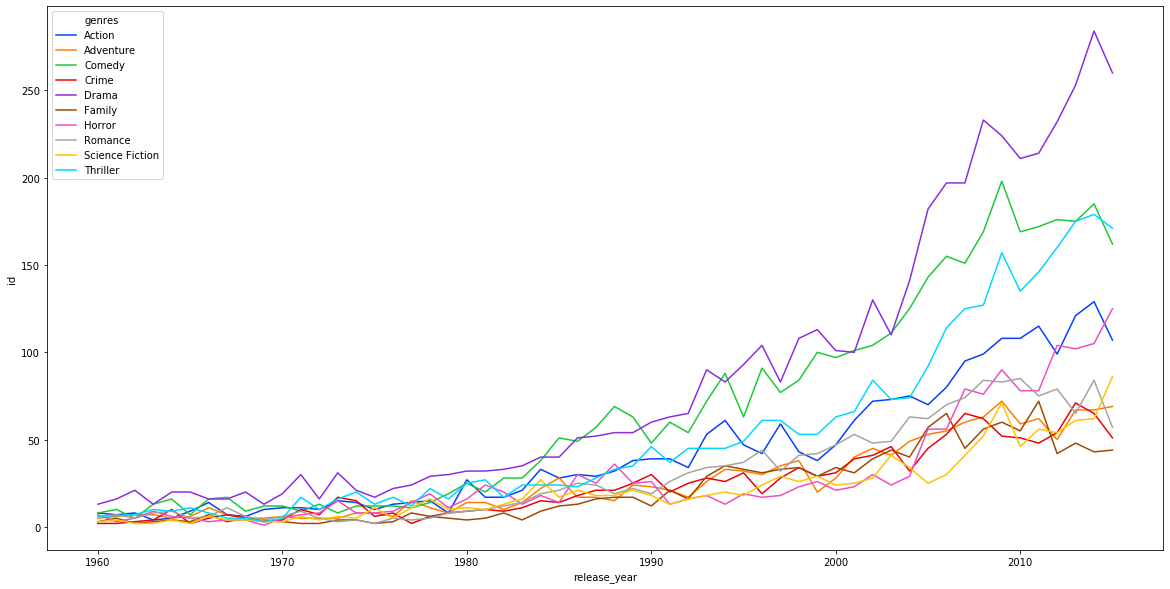

In [17]:
plt.figure(figsize=(20,10))
palette = sns.color_palette("hls", 10)
sns.lineplot(x="release_year", y="id", hue="genres",data =generes_per_year.loc[generes_per_year.genres.isin(top_10)],palette = "bright")
plt.show()

In [18]:
# bottom 10
bottom_10 = list(generes_per_year.groupby('genres').id.sum().sort_values(ascending=False).to_dict().keys())[-10:]

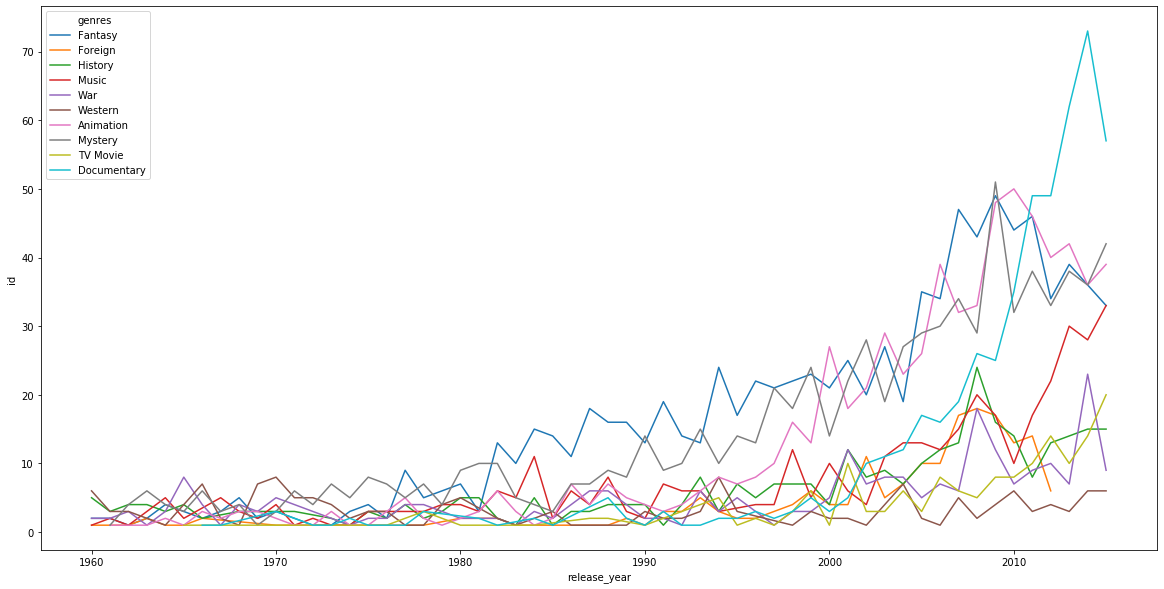

In [19]:
import seaborn as sns
plt.figure(figsize=(20,10),)

sns.lineplot(x="release_year", y="id", hue="genres",data =generes_per_year.loc[generes_per_year.genres.isin(bottom_10)])

## 2. Directors vs profits analysis

#### For that part of the analysis a new column will be added to calculate the profit

In the next step will create a new copy of the dataframe, where the null director entries will be dropped

In [20]:
df_director_analysis=df.drop(df.index[df.director.isnull()],axis=0)
df_director_analysis.shape

(10801, 24)

Use explode to make an entry for each director

In [21]:
df_director_analysis.director =df_director_analysis.director.apply(lambda x:x.split("|"))
df_director_analysis = df_director_analysis.explode('director')
df_director_analysis.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,vote_count_ratio,weighted_vote
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,0.569469,3.701546
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,0.633255,4.496109
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,0.253916,1.599672
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,0.541825,4.063684
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,0.301730,2.202631


#### Make a plot for the average weighted vote for each director on a bar chart

In [22]:
directors_vs_votes=df_director_analysis.groupby('director',as_index=False).aggregate({'weighted_vote':'mean'}).sort_values('weighted_vote',ascending=False)
directors_vs_votes.reset_index(inplace=True,drop=True)

[Text(0, 0, 'Christopher Nolan'),
 Text(0, 0, 'Bob Peterson'),
 Text(0, 0, 'Pierre Coffin'),
 Text(0, 0, 'Shane Black'),
 Text(0, 0, 'Rich Moore'),
 Text(0, 0, 'Lee Unkrich'),
 Text(0, 0, 'Pete Docter'),
 Text(0, 0, 'Alex Garland'),
 Text(0, 0, 'J.J. Abrams'),
 Text(0, 0, 'Joss Whedon')]

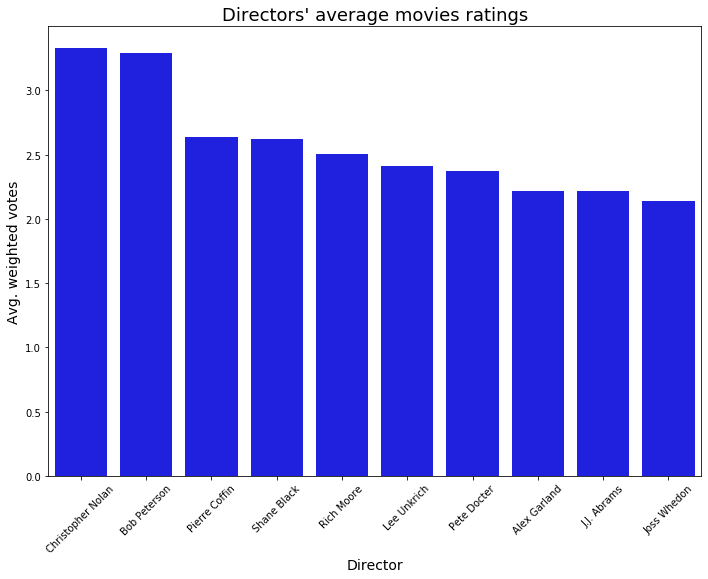

In [23]:
f, ax = plt.subplots(figsize = (11.7,8.27))
p=sns.barplot(x='director',y='weighted_vote',color='blue',data=directors_vs_votes[:10])
p.axes.set_title("Directors' average movies ratings",fontsize=18)
ax.set_xlabel('Director',fontsize=14)
ax.set_ylabel('Avg. weighted votes',fontsize=14)
ax.set_xticklabels(labels=directors_vs_votes.director[:10], rotation=45)


#### to better prepare the data for movies' profit comparison, movies with 0 budget and revenue will be dropped

In [24]:
no_profit_rev = df_director_analysis[(df_director_analysis.budget_adj==0)&(df_director_analysis.revenue_adj==0)].index
df_director_analysis=df_director_analysis.drop(no_profit_rev,axis=0)

#### Create a bar chart for the movies' average profit for each director on a bar chart as well

In [25]:
directors_vs_profit=df_director_analysis.groupby('director',as_index=False).aggregate({'profit':'mean'}).sort_values('profit',ascending=False)
directors_vs_profit.reset_index(inplace=True,drop=True)

[Text(0, 0, 'Hamilton Luske'),
 Text(0, 0, 'Clyde Geronimi'),
 Text(0, 0, 'Jennifer Lee'),
 Text(0, 0, 'George Lucas'),
 Text(0, 0, 'David Yates'),
 Text(0, 0, 'Pierre Coffin'),
 Text(0, 0, 'Mike Thurmeier'),
 Text(0, 0, 'Lee Unkrich'),
 Text(0, 0, 'James Cameron'),
 Text(0, 0, 'Wolfgang Reitherman')]

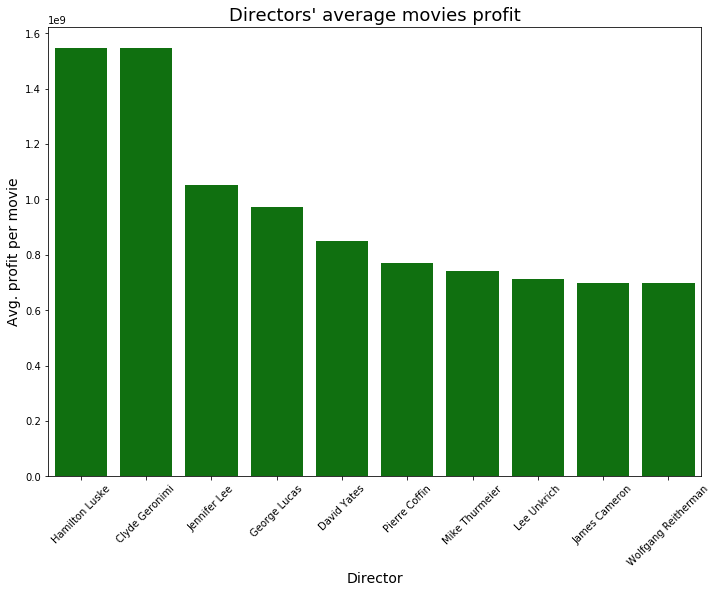

In [26]:
f, ax = plt.subplots(figsize = (11.7,8.27))
p=sns.barplot(x='director',y='profit',color='green',data=directors_vs_profit[:10])
p.axes.set_title("Directors' average movies profit",fontsize=18)
ax.set_xlabel('Director',fontsize=14)
ax.set_ylabel('Avg. profit per movie',fontsize=14)
ax.set_xticklabels(labels=directors_vs_profit.director[:10], rotation=45)

- The 2 figures above show that Christopher Nolan has the highest average weighted votes for his movies and that Hamilton Luske and Clyde Geronimi direct the movies' with the highest profit in average.
- Although having the highest rated movies, Christopher Nolan's directed movies in average doesn't put him in the top 10 when it comes to profit.
- This data also shows that some directors despite creating a financilly successful movies, they aren't the best when it comes to audience opinion.

<a id='conclusions'></a>
## Conclusions

> Regarding the first part, the graphs has shown a significant increase in the number of movies created in general over the inspected period, although that doesn't apply for some movie genres such as westeren and tv movies, other movie genres production thrived significantly such as drama, comedy and thriller

> Regarding the second part, the data and visualization showed the top 10 directors using the average of the votes of the audience, that being said, it was clear that movie votes which should represent the audience opinion over a movie.
Hence we could find that director such as Christopher Nolan, while having the top spot when it comes to audience rating of his movie, he isn't in the top 10 when it comes to financial success of his movies.
That may be an indication that directors who create a highly appreciated movies tend to spend more, hence a relativley less profit.